# Секции на бегущей волне, соединённые волноводом

## Система уравнений

В качестве упрощённой модели для сравнения предлагается взять три ячейки, связанные друг с другом электрической связью, и четвётрую ячейку, подключённю к ним при помощи волновода. Система, описывающая такую модель:

$$
\begin{cases}
\left(
    1
    -
    \frac{f^2}{f_1^2}
    +
    j\frac {f}{f_1}
    \frac{1+\chi_g}{Q_1}
\right)
\dot X_1
+
\left(
    \frac{f^2}{f_1 f_2}
    \frac{K_{12}^H}{2}
    -
    \frac{K_{12}^E}{2}
\right)
\dot X_2
=
j 4
\sqrt{\pi\frac {f}{f_1}f P_g\frac{\chi_g}{Q_1}}	\exp (j\varphi)
\\
\left(
    \frac{f^2}{f_1 f_2}
    \frac{K_{12}^H}{2}
    -
    \frac{K_{12}^E}{2}
\right)
\dot X_1
+
\left(
    1
    -
    \frac{f^2}{f_2^2}
    +
    j\frac {f}{f_2}
    \frac{1}{Q_2}
\right)
\dot X_2
+
\left(
    \frac{f^2}{f_2 f_3}
    \frac{K_{23}^H}{2}
    -
    \frac{K_{23}^E}{2}
\right)
\dot X_3
=
0
\\
\left(
    \frac{f^2}{f_2 f_3}
    \frac{K_{23}^H}{2}
    -
    \frac{K_{23}^E}{2}
\right)
\dot X_2
+
\left(
    1
    -
    \frac{f^2}{f_3^2}
    +
    j\frac {f}{f_3}
    \frac{\left(1+\chi_{34}\sinh(\gamma L_W)+\frac{\chi_{34}}{\tanh(\gamma L_W)}\right)}{Q_3}
\right)
\dot X_3
-
j \frac{f}{\sinh(\gamma L_W)}
\sqrt{\frac{\chi_{34}}{Q_3Q_4f_3f_4}}
\dot X_4
=
0
\\
-j \frac{f}{\sinh(\gamma L_W)}
\sqrt{\frac{\chi_{43}}{Q_3Q_4f_3f_4}}
\dot X_3
+
\left(
    1
    -
    \frac{f^2}{f_4^2}
    +
    j\frac {f}{f_4}
    \frac{\left(1+\chi_{43}\sinh(\gamma L_W)+\frac{\chi_{43}}{\tanh(\gamma L_W)}\right)}{Q_4}
\right)
\dot X_4
+
\left(
    \frac{f^2 K_{45}^H}{2f_4f_5}
    -
    \frac{K_{45}^E} 2
\right)
\dot X_5
=
0
\\
\left(
    \frac{f^2K_{45}^H}{2f_4f_5}
    -
    \frac{K_{45}^E} 2
\right)
\dot X_4
+
\left(
    1
    -
    \frac{f^2}{f_5^2}
    +
    j\frac {f}{f_5}
    \frac{1}{Q_5}
\right)
\dot X_5
+
\left(
    \frac{f^2K_{56}^H}{2f_5f_6}
    -
    \frac{K_{56}^E} 2
\right)
\dot X_6
=
0
\\
\left(
    \frac{f^2K_{56}^H}{2f_5f_6}
    -
    \frac{K_{56}^E} 2
\right)
\dot X_5
+
\left(
    1
    -
    \frac{f^2}{f_6^2}
    +
    j\frac {f}{f_6}
    \frac{1}{Q_6}
\right)
\dot X_6
=
0
\end{cases}
$$

В матричном виде эта система выглядит так:

$$[A][X]=[B]$$

Запишем уравнения элементов матриц A и B:

In [1]:
a11 <- "1 - f^2/data$f1^2 + 1i * f/data$f1 * (1+data$chi_g1) / data$Q1"
a12 <- "f^2 * data$Kh12 / (2*data$f1*data$f2) - data$Ke12/2"
a13 <- "0"
a14 <- "0"
a15 <- "0"
a16 <- "0"
a21 <- a12
a22 <- "1 - f^2/data$f2^2 + 1i * f/data$f2 / data$Q2"
a23 <- "f^2 * data$Kh23 / (2*data$f2*data$f3) - data$Ke23/2"
a24 <- "0"
a25 <- "0"
a26 <- "0"
a31 <- "0"
a32 <- a23
a33 <- "1 - f^2/data$f3^2 + 1i * f/data$f3 *
(1 + data$chi34 / sinh((data$alpha-1i*data$beta)*data$L) + data$chi34 *
tanh((data$alpha-1i*data$beta)*data$L/2)) / data$Q3"
a34 <- "-1i / sinh((data$alpha-1i*data$beta)*data$L) * f *
sqrt( data$chi34 / (data$Q3*data$Q4*data$f3*data$f4))"
a35 <- "0"
a36 <- "0"
a41 <- "0"
a42 <- "0"
a43 <- a34
a44 <- "1 - f^2/data$f4^2 + 1i * f/data$f4 *
(1 + data$chi34 / sinh((data$alpha-1i*data$beta)*data$L) + data$chi34 *
tanh((data$alpha-1i*data$beta)*data$L/2)) / data$Q4"
a45 <- "f^2 * data$Kh45 / (2*data$f4*data$f5) - data$Ke45/2"
a46 <- "0"
a51 <- "0"
a52 <- "0"
a53 <- "0"
a54 <- a45
a55 <- "1 - f^2/data$f5^2 + 1i * f/data$f5 / data$Q5"
a56 <- "f^2 * data$Kh56 / (2*data$f5*data$f6) - data$Ke56/2"
a61 <- "0"
a62 <- "0"
a63 <- "0"
a64 <- "0"
a65 <- a56
a66 <- "1 - f^2/data$f6^2 + 1i * f/data$f6 * (1+data$chi_g6) / data$Q6"

b1 <- "4i*sqrt(pi*f^2/data$f1*data$P*data$chi_g1/data$Q1)"
b2 <- "0"
b3 <- "0"
b4 <- "0"
b5 <- "0"
b6 <- "0"

## Параметры ячеек

In [2]:
data = list()
data$f1      <- 2855e6
data$f2      <- 2854.15e6
data$f3      <- 2855e6
data$f4      <- 2855e6
data$f5      <- 2854.15e6
data$f6      <- 2855e6
data$Q1      <- 1.4e4
data$Q2      <- 1.4e4
data$Q3      <- 1.4e4
data$Q4      <- 1.4e4
data$Q5      <- 1.4e4
data$Q6      <- 1.4e4
data$Kh12    <- 0.000281
data$Kh23    <- 0.000281
data$Kh45    <- 0.000281
data$Kh56    <- 0.000281
data$Ke12    <- 0.003052
data$Ke23    <- 0.003052
data$Ke45    <- 0.003052
data$Ke56    <- 0.003052
data$chi_g1  <- 17.79
data$chi_g6  <- 17.79
data$L       <- 0.05
data$P       <- 1
data$alpha   <- 0.1
data$beta    <- 30
data$chi34   <- 1
data$chi43   <- 1

## Функция нахождения распределения полей в статическом режиме

In [3]:
# Решатель уравнений, где freq - вектор частот генератора
solveX <- function(freq, data, A, B) {
    output <- data.frame(matrix(NA, nrow = nrow(A), ncol = 0))
    for (f in freq) {
        output[as.character(f)] <- solve(apply(X = A, MARGIN = c(1,2), FUN = function(x) {eval(parse(text = x))}),
                                         apply(X = B, MARGIN = c(1), FUN = function(x) {eval(parse(text = x))}))
    }
    return(output)
}

## Функция нахождения входного сопротивления

Выражение для входного сопротивления первой ячейки выглядит так:

$$
\hat Z_{in}
=
\chi_g
\left\{
    1
    +
    j
    Q_1
    \left[
        \frac {f}{f_1}
        -
        \frac{f_1}{f}
        -
        \left(
            \frac{f}{f_2}
            \frac{K_{12}^H}{2}
            -
            \frac{f_1}{f}
            \frac{K_{12}^E}{2}
        \right)
        \frac{\dot X_2}{\dot X_1}
     \right]
\right\}^{-1}
$$

Запишем функцию, решающую данное уравнение:

In [4]:
z_fun <- "data$chi_g1/(1+1i*data$Q1*(f/data$f1-data$f1/f-(f*data$Kh12/(data$f2*2)-data$f1*data$Ke12/(f*2))*X2_norm))"


solveZ <- function(X) {
    output <- list(f=NULL, z=NULL)
    freq <- as.numeric(names(X))
    X <- apply(X=X, MARGIN = c(2), FUN = function(x) {return(x/x[1])})
    for (f in freq) {
        X2_norm <- X[,as.character(f)][2]
        output$f <- append(f, output$f)
        output$z <- append(eval(parse(text = z_fun)), output$z)
    }
    return(output)
}

## Секция на бегущей волне

Для проверки выражений, решим систему уравнений для секции на бегущей волне:

In [5]:
A <- matrix(c(a11, a21, a31, a12, a22, a32, a13, a23, a11), nrow = 3) # Заметка: элементы матрицы a11 и a33 приравнены
B <- matrix(c(b1, b2, b3), nrow = 3)

cat("A:\n")
print(A)
cat("\n\nB:\n")
print(B)

A:
     [,1]                                                            
[1,] "1 - f^2/data$f1^2 + 1i * f/data$f1 * (1+data$chi_g1) / data$Q1"
[2,] "f^2 * data$Kh12 / (2*data$f1*data$f2) - data$Ke12/2"           
[3,] "0"                                                             
     [,2]                                                 
[1,] "f^2 * data$Kh12 / (2*data$f1*data$f2) - data$Ke12/2"
[2,] "1 - f^2/data$f2^2 + 1i * f/data$f2 / data$Q2"       
[3,] "f^2 * data$Kh23 / (2*data$f2*data$f3) - data$Ke23/2"
     [,3]                                                            
[1,] "0"                                                             
[2,] "f^2 * data$Kh23 / (2*data$f2*data$f3) - data$Ke23/2"           
[3,] "1 - f^2/data$f1^2 + 1i * f/data$f1 * (1+data$chi_g1) / data$Q1"


B:
     [,1]                                                
[1,] "4i*sqrt(pi*f^2/data$f1*data$P*data$chi_g1/data$Q1)"
[2,] "0"                                                 
[3,] "0"              

 Выше приведены выражения уравнения, использующиеся для расчётов.

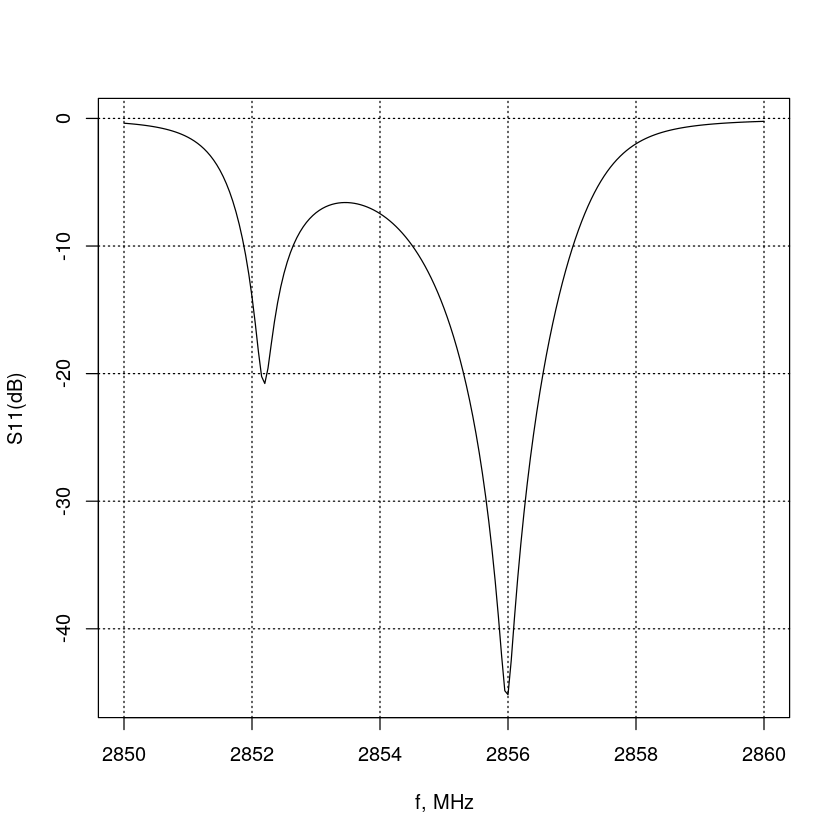

In [6]:
Z <- solveZ(solveX(seq(2850e6, 2860e6, length.out = 201), data, A, B))
Z_db <- 20 * log10(abs(Mod((Z$z - 1) / (Z$z + 1))))  # S11_lin = (Z-1)/(Z+1); S11_dB = 20*log10(S11_lin)
plot(x=Z$f/1e6, y=Z_db, type = 'l', ylab = "S11(dB)", xlab = "f, MHz")
grid(col='black')

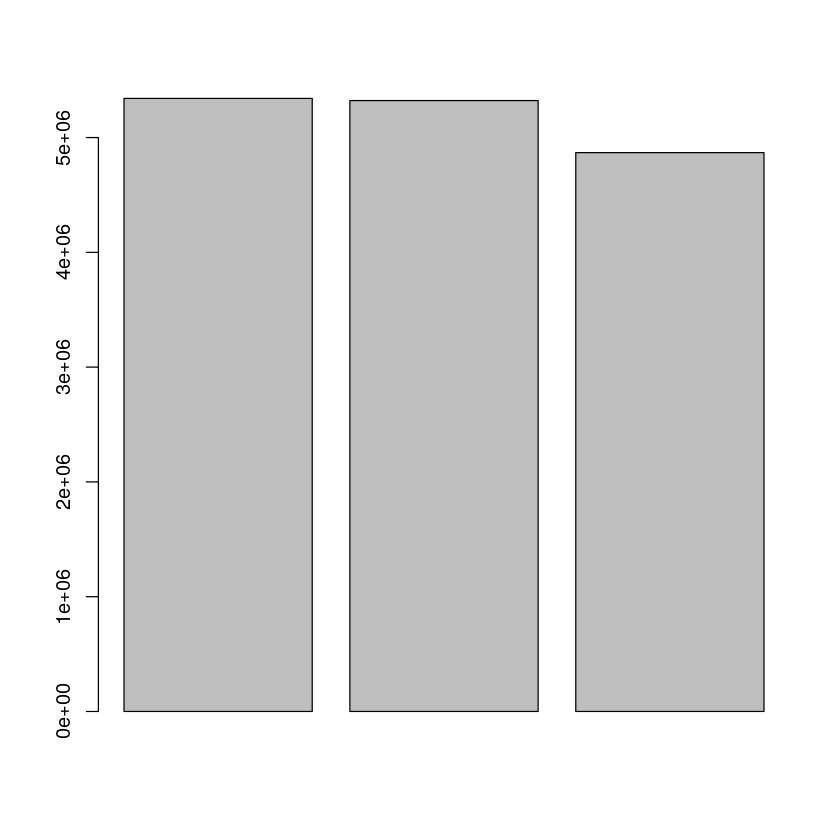

In [7]:
barplot(Mod(solveX(2856e6,data, A, B)[,1]))

## Гибридная секция

In [8]:
A <- matrix(c(a11, a21, a31, a41, a51, a61,
              a12, a22, a32, a42, a52, a62,
              a13, a23, a33, a32, a53, a63,
              a14, a24, a23, a44, a54, a64,
              a15, a25, a35, a45, a55, a65,
              a16, a26, a36, a46, a56, a66), nrow = 6)
B <- matrix(c(b1, b2, b3, b4, b5, b6), nrow = 6)


cat("A:\n")
print(A)
cat("\n\nB:\n")
print(B)

A:
     [,1]                                                            
[1,] "1 - f^2/data$f1^2 + 1i * f/data$f1 * (1+data$chi_g1) / data$Q1"
[2,] "f^2 * data$Kh12 / (2*data$f1*data$f2) - data$Ke12/2"           
[3,] "0"                                                             
[4,] "0"                                                             
[5,] "0"                                                             
[6,] "0"                                                             
     [,2]                                                 
[1,] "f^2 * data$Kh12 / (2*data$f1*data$f2) - data$Ke12/2"
[2,] "1 - f^2/data$f2^2 + 1i * f/data$f2 / data$Q2"       
[3,] "f^2 * data$Kh23 / (2*data$f2*data$f3) - data$Ke23/2"
[4,] "0"                                                  
[5,] "0"                                                  
[6,] "0"                                                  
     [,3]                                                                                     

 Выше приведены выражения уравнения, использующиеся для расчётов.

Построим зависимость параметра S11 от длины соединяющего волновода:

---
# $\chi=5$

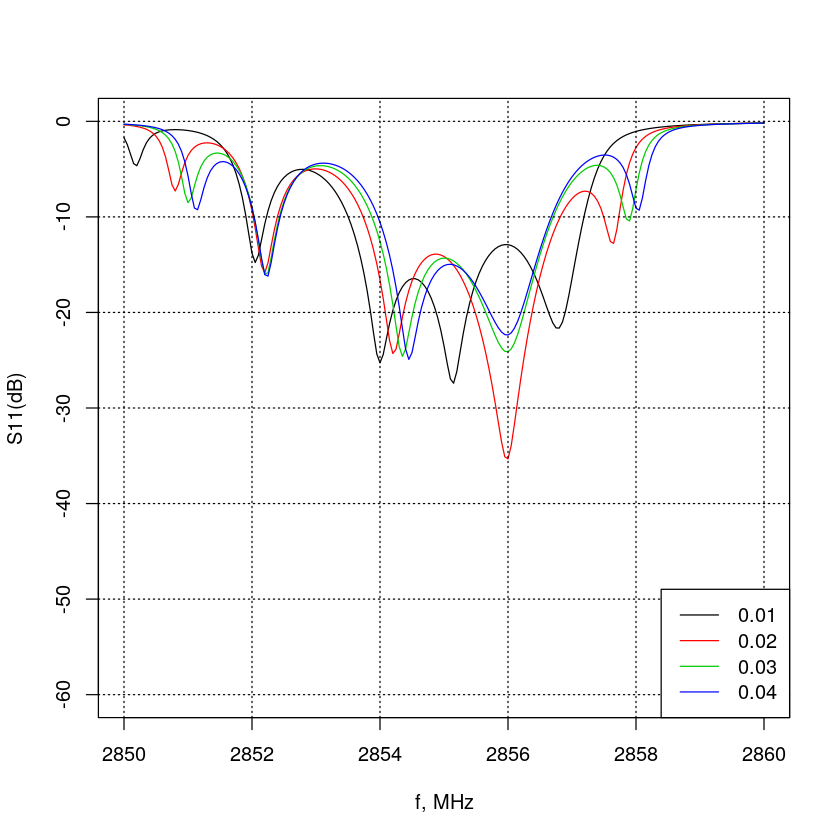

In [9]:
data$chi34   <- 5
data$chi43   <- 5
dat <- seq(0.01,0.04,0.01)
data$L <- dat[1]
Z <- solveZ(solveX(seq(2850e6, 2860e6, length.out = 201), data, A, B))
Z_db <- 20 * log10(abs(Mod((Z$z - 1) / (Z$z + 1))))  # S11_lin = (Z-1)/(Z+1); S11_dB = 20*log10(S11_lin)
plot(x=Z$f/1e6, y=Z_db, type = 'l', ylab = "S11(dB)", xlab = "f, MHz", ylim = c(-60, 0))
j <- 1
for (i in dat[-1]) {
data$L <- i
j <- j+1
Z <- solveZ(solveX(seq(2850e6, 2860e6, length.out = 201), data, A, B))
Z_db <- 20 * log10(abs(Mod((Z$z - 1) / (Z$z + 1))))  # S11_lin = (Z-1)/(Z+1); S11_dB = 20*log10(S11_lin)
lines(x=Z$f/1e6, y=Z_db, type = 'l', col=j)
}
grid(col='black')
legend("bottomright", legend=round(dat,2), lty=1, col=c(1:length(dat)))

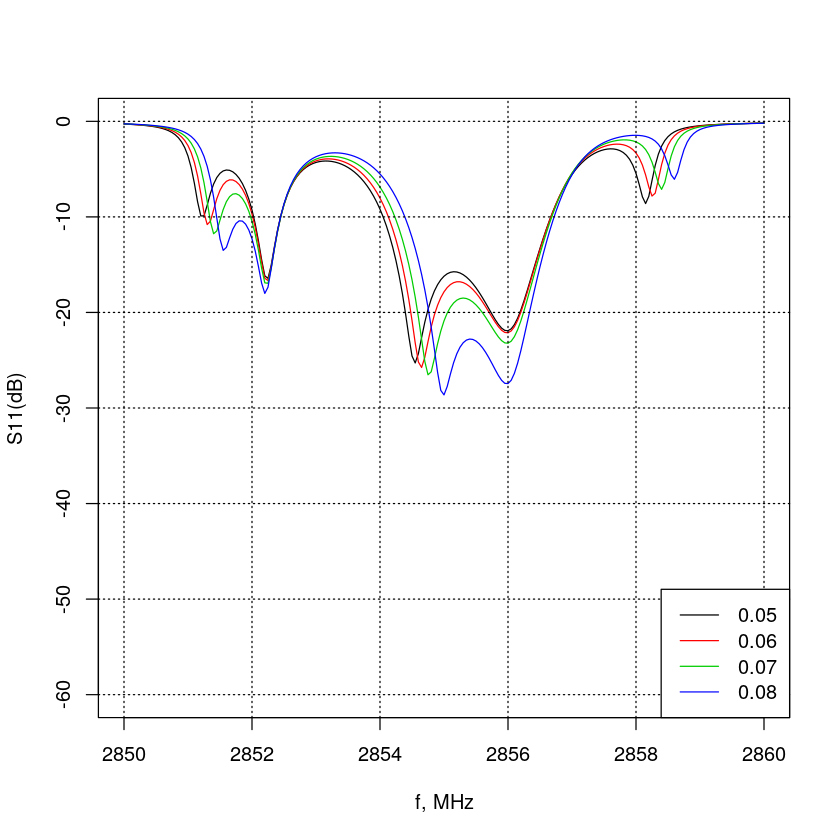

In [10]:
data$chi34   <- 5
data$chi43   <- 5
dat <- seq(0.05,0.08,0.01)
data$L <- dat[1]
Z <- solveZ(solveX(seq(2850e6, 2860e6, length.out = 201), data, A, B))
Z_db <- 20 * log10(abs(Mod((Z$z - 1) / (Z$z + 1))))  # S11_lin = (Z-1)/(Z+1); S11_dB = 20*log10(S11_lin)
plot(x=Z$f/1e6, y=Z_db, type = 'l', ylab = "S11(dB)", xlab = "f, MHz", ylim = c(-60, 0))
j <- 1
for (i in dat[-1]) {
data$L <- i
j <- j+1
Z <- solveZ(solveX(seq(2850e6, 2860e6, length.out = 201), data, A, B))
Z_db <- 20 * log10(abs(Mod((Z$z - 1) / (Z$z + 1))))  # S11_lin = (Z-1)/(Z+1); S11_dB = 20*log10(S11_lin)
lines(x=Z$f/1e6, y=Z_db, type = 'l', col=j)
}
grid(col='black')
legend("bottomright", legend=round(dat,2), lty=1, col=c(1:length(dat)))

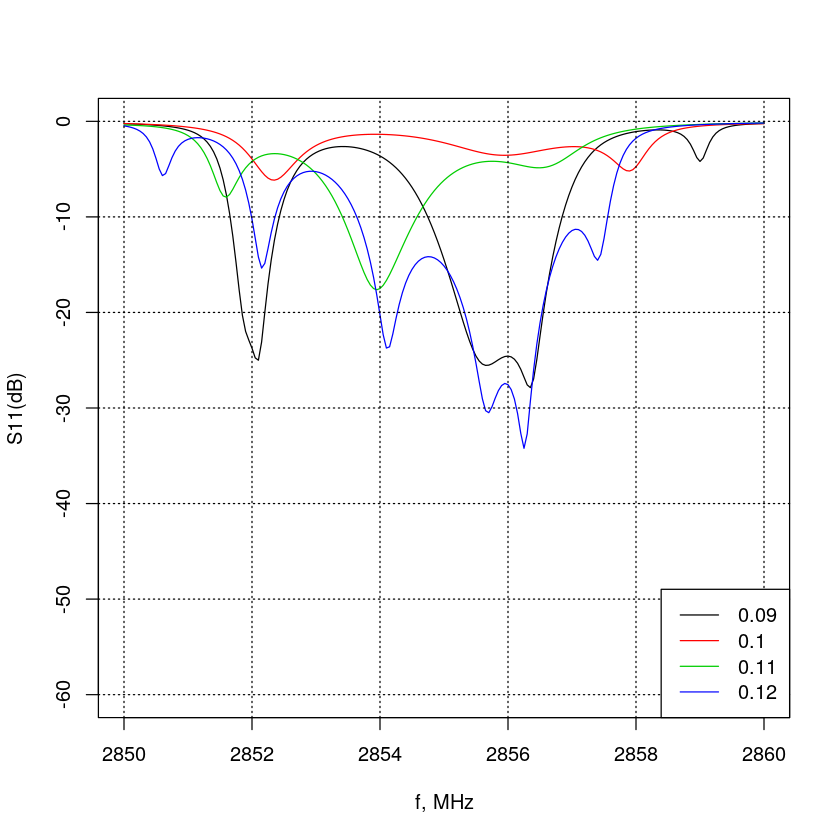

In [11]:
data$chi34   <- 5
data$chi43   <- 5
dat <- seq(0.09,0.12,0.01)
data$L <- dat[1]
Z <- solveZ(solveX(seq(2850e6, 2860e6, length.out = 201), data, A, B))
Z_db <- 20 * log10(abs(Mod((Z$z - 1) / (Z$z + 1))))  # S11_lin = (Z-1)/(Z+1); S11_dB = 20*log10(S11_lin)
plot(x=Z$f/1e6, y=Z_db, type = 'l', ylab = "S11(dB)", xlab = "f, MHz", ylim = c(-60, 0))
j <- 1
for (i in dat[-1]) {
data$L <- i
j <- j+1
Z <- solveZ(solveX(seq(2850e6, 2860e6, length.out = 201), data, A, B))
Z_db <- 20 * log10(abs(Mod((Z$z - 1) / (Z$z + 1))))  # S11_lin = (Z-1)/(Z+1); S11_dB = 20*log10(S11_lin)
lines(x=Z$f/1e6, y=Z_db, type = 'l', col=j)
}
grid(col='black')
legend("bottomright", legend=round(dat,2), lty=1, col=c(1:length(dat)))

---
# $\chi=15$

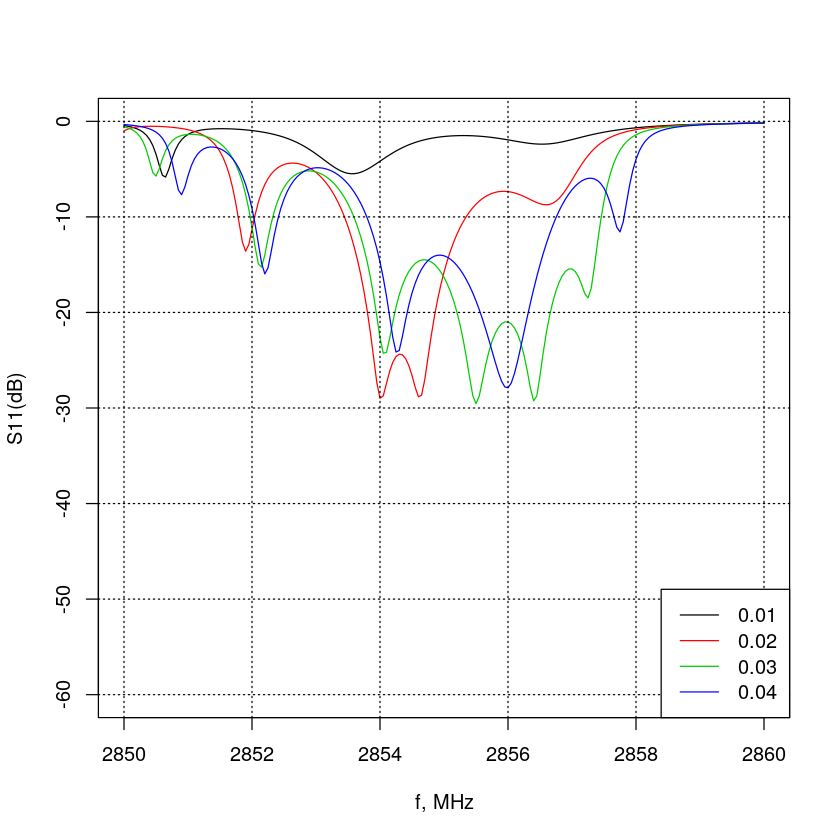

In [12]:
data$chi34   <- 15
data$chi43   <- 15
dat <- seq(0.01,0.04,0.01)
data$L <- dat[1]
Z <- solveZ(solveX(seq(2850e6, 2860e6, length.out = 201), data, A, B))
Z_db <- 20 * log10(abs(Mod((Z$z - 1) / (Z$z + 1))))  # S11_lin = (Z-1)/(Z+1); S11_dB = 20*log10(S11_lin)
plot(x=Z$f/1e6, y=Z_db, type = 'l', ylab = "S11(dB)", xlab = "f, MHz", ylim = c(-60, 0))
j <- 1
for (i in dat[-1]) {
data$L <- i
j <- j+1
Z <- solveZ(solveX(seq(2850e6, 2860e6, length.out = 201), data, A, B))
Z_db <- 20 * log10(abs(Mod((Z$z - 1) / (Z$z + 1))))  # S11_lin = (Z-1)/(Z+1); S11_dB = 20*log10(S11_lin)
lines(x=Z$f/1e6, y=Z_db, type = 'l', col=j)
}
grid(col='black')
legend("bottomright", legend=round(dat,2), lty=1, col=c(1:length(dat)))

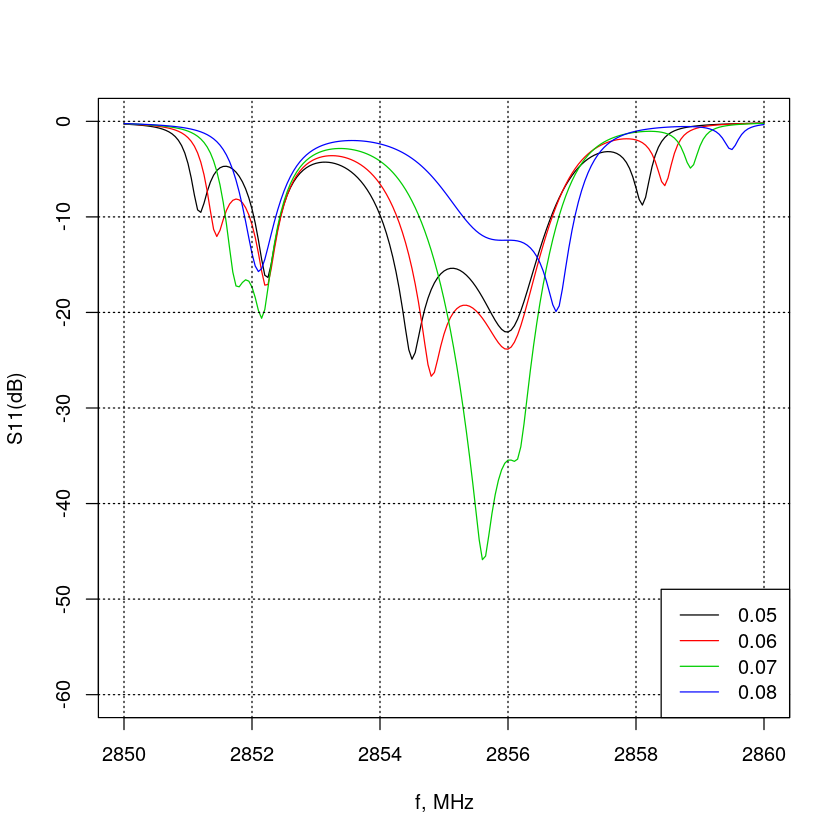

In [13]:
data$chi34   <- 15
data$chi43   <- 15
dat <- seq(0.05,0.08,0.01)
data$L <- dat[1]
Z <- solveZ(solveX(seq(2850e6, 2860e6, length.out = 201), data, A, B))
Z_db <- 20 * log10(abs(Mod((Z$z - 1) / (Z$z + 1))))  # S11_lin = (Z-1)/(Z+1); S11_dB = 20*log10(S11_lin)
plot(x=Z$f/1e6, y=Z_db, type = 'l', ylab = "S11(dB)", xlab = "f, MHz", ylim = c(-60, 0))
j <- 1
for (i in dat[-1]) {
data$L <- i
j <- j+1
Z <- solveZ(solveX(seq(2850e6, 2860e6, length.out = 201), data, A, B))
Z_db <- 20 * log10(abs(Mod((Z$z - 1) / (Z$z + 1))))  # S11_lin = (Z-1)/(Z+1); S11_dB = 20*log10(S11_lin)
lines(x=Z$f/1e6, y=Z_db, type = 'l', col=j)
}
grid(col='black')
legend("bottomright", legend=round(dat,2), lty=1, col=c(1:length(dat)))

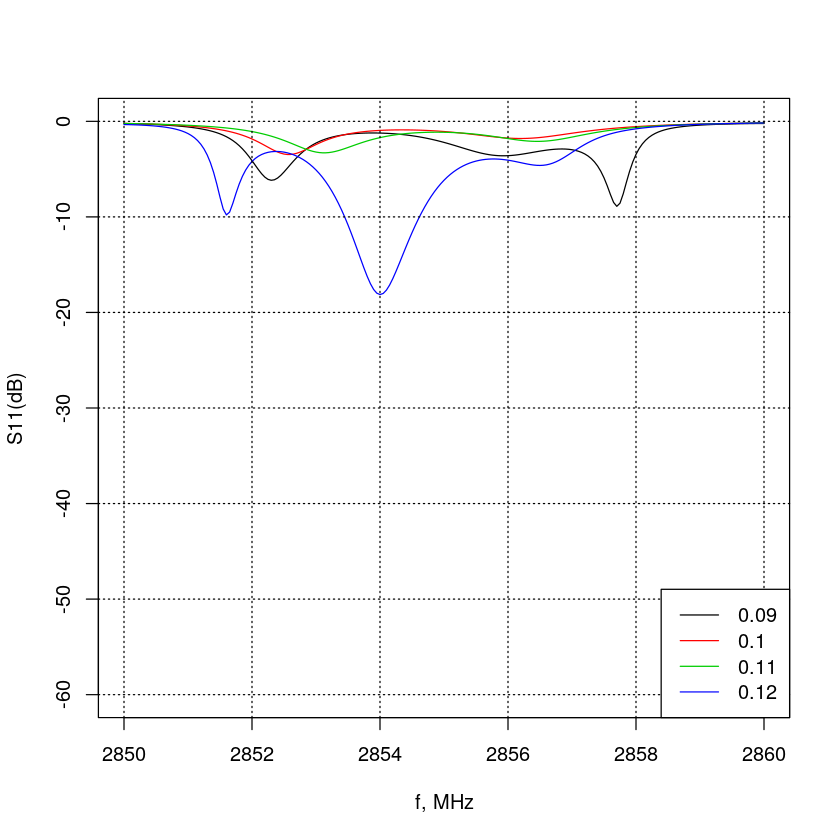

In [14]:
data$chi34   <- 15
data$chi43   <- 15
dat <- seq(0.09,0.12,0.01)
data$L <- dat[1]
Z <- solveZ(solveX(seq(2850e6, 2860e6, length.out = 201), data, A, B))
Z_db <- 20 * log10(abs(Mod((Z$z - 1) / (Z$z + 1))))  # S11_lin = (Z-1)/(Z+1); S11_dB = 20*log10(S11_lin)
plot(x=Z$f/1e6, y=Z_db, type = 'l', ylab = "S11(dB)", xlab = "f, MHz", ylim = c(-60, 0))
j <- 1
for (i in dat[-1]) {
data$L <- i
j <- j+1
Z <- solveZ(solveX(seq(2850e6, 2860e6, length.out = 201), data, A, B))
Z_db <- 20 * log10(abs(Mod((Z$z - 1) / (Z$z + 1))))  # S11_lin = (Z-1)/(Z+1); S11_dB = 20*log10(S11_lin)
lines(x=Z$f/1e6, y=Z_db, type = 'l', col=j)
}
grid(col='black')
legend("bottomright", legend=round(dat,2), lty=1, col=c(1:length(dat)))

---
# $\chi=17$

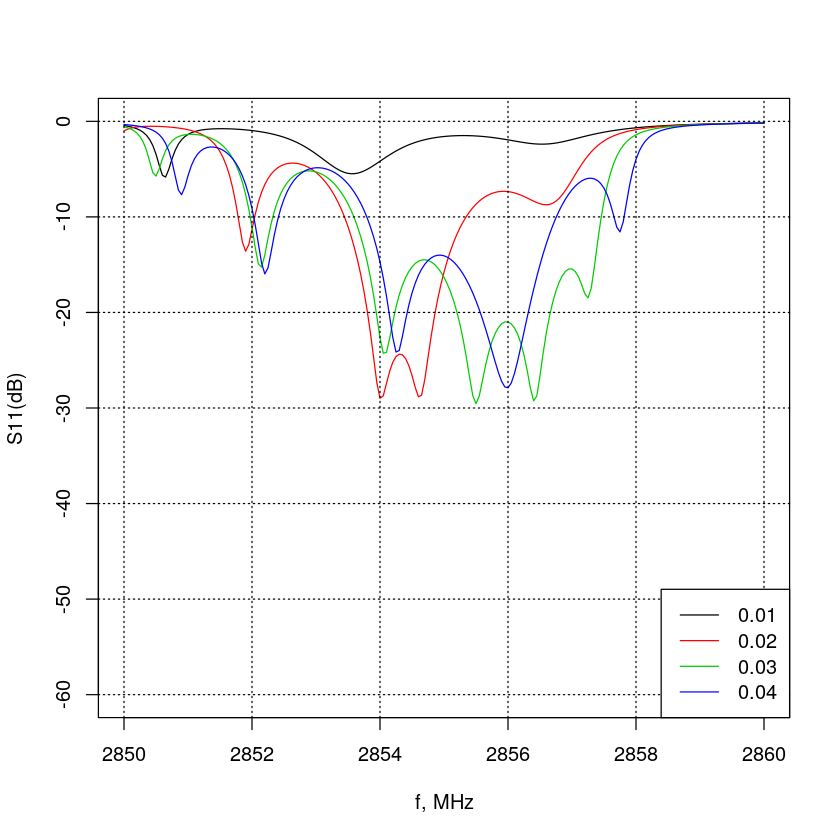

In [15]:
###### data$chi34   <- 17
data$chi43   <- 17
dat <- seq(0.01,0.04,0.01)
data$L <- dat[1]
Z <- solveZ(solveX(seq(2850e6, 2860e6, length.out = 201), data, A, B))
Z_db <- 20 * log10(abs(Mod((Z$z - 1) / (Z$z + 1))))  # S11_lin = (Z-1)/(Z+1); S11_dB = 20*log10(S11_lin)
plot(x=Z$f/1e6, y=Z_db, type = 'l', ylab = "S11(dB)", xlab = "f, MHz", ylim = c(-60, 0))
j <- 1
for (i in dat[-1]) {
data$L <- i
j <- j+1
Z <- solveZ(solveX(seq(2850e6, 2860e6, length.out = 201), data, A, B))
Z_db <- 20 * log10(abs(Mod((Z$z - 1) / (Z$z + 1))))  # S11_lin = (Z-1)/(Z+1); S11_dB = 20*log10(S11_lin)
lines(x=Z$f/1e6, y=Z_db, type = 'l', col=j)
}
grid(col='black')
legend("bottomright", legend=round(dat,2), lty=1, col=c(1:length(dat)))

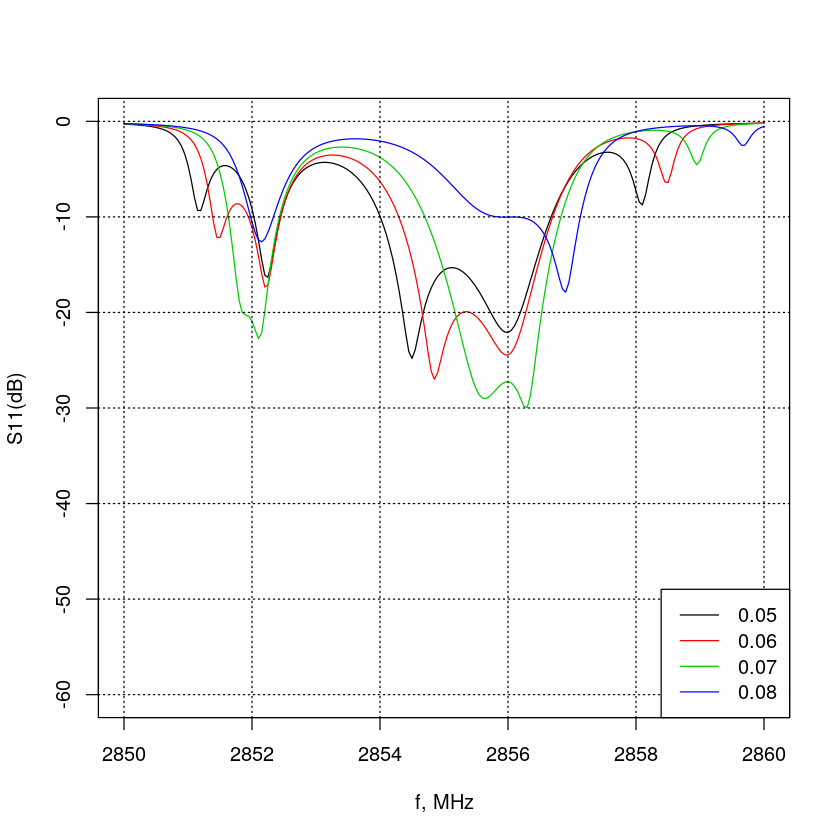

In [16]:
data$chi34   <- 17
data$chi43   <- 17
dat <- seq(0.05,0.08,0.01)
data$L <- dat[1]
Z <- solveZ(solveX(seq(2850e6, 2860e6, length.out = 201), data, A, B))
Z_db <- 20 * log10(abs(Mod((Z$z - 1) / (Z$z + 1))))  # S11_lin = (Z-1)/(Z+1); S11_dB = 20*log10(S11_lin)
plot(x=Z$f/1e6, y=Z_db, type = 'l', ylab = "S11(dB)", xlab = "f, MHz", ylim = c(-60, 0))
j <- 1
for (i in dat[-1]) {
data$L <- i
j <- j+1
Z <- solveZ(solveX(seq(2850e6, 2860e6, length.out = 201), data, A, B))
Z_db <- 20 * log10(abs(Mod((Z$z - 1) / (Z$z + 1))))  # S11_lin = (Z-1)/(Z+1); S11_dB = 20*log10(S11_lin)
lines(x=Z$f/1e6, y=Z_db, type = 'l', col=j)
}
grid(col='black')
legend("bottomright", legend=round(dat,2), lty=1, col=c(1:length(dat)))

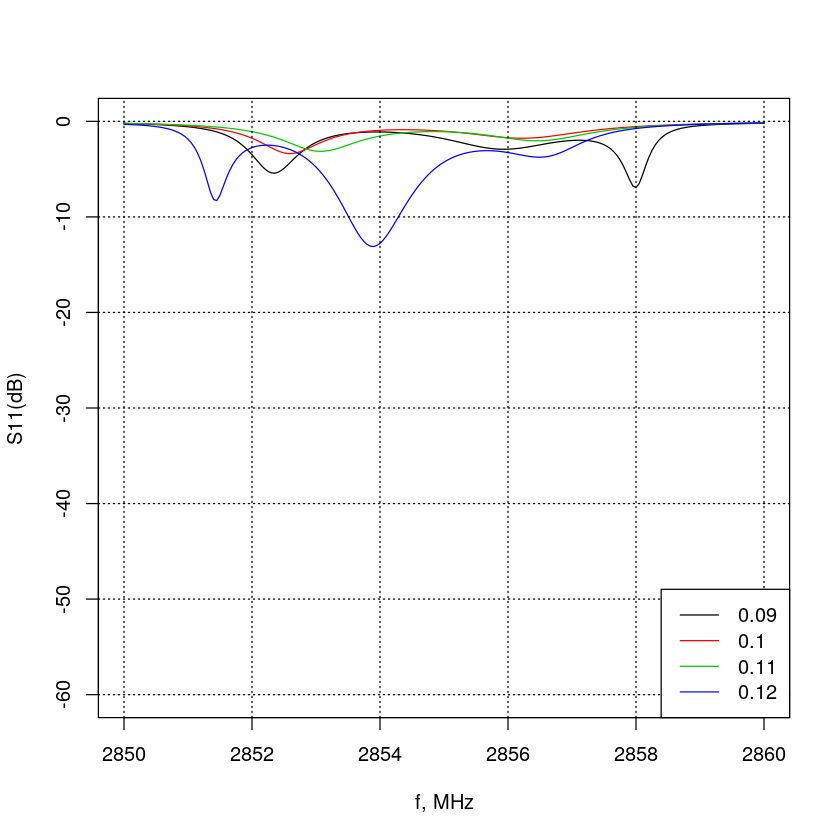

In [17]:
data$chi34   <- 17
data$chi43   <- 17
dat <- seq(0.09,0.12,0.01)
data$L <- dat[1]
Z <- solveZ(solveX(seq(2850e6, 2860e6, length.out = 201), data, A, B))
Z_db <- 20 * log10(abs(Mod((Z$z - 1) / (Z$z + 1))))  # S11_lin = (Z-1)/(Z+1); S11_dB = 20*log10(S11_lin)
plot(x=Z$f/1e6, y=Z_db, type = 'l', ylab = "S11(dB)", xlab = "f, MHz", ylim = c(-60, 0))
j <- 1
for (i in dat[-1]) {
data$L <- i
j <- j+1
Z <- solveZ(solveX(seq(2850e6, 2860e6, length.out = 201), data, A, B))
Z_db <- 20 * log10(abs(Mod((Z$z - 1) / (Z$z + 1))))  # S11_lin = (Z-1)/(Z+1); S11_dB = 20*log10(S11_lin)
lines(x=Z$f/1e6, y=Z_db, type = 'l', col=j)
}
grid(col='black')
legend("bottomright", legend=round(dat,2), lty=1, col=c(1:length(dat)))

---
# $\chi=19$

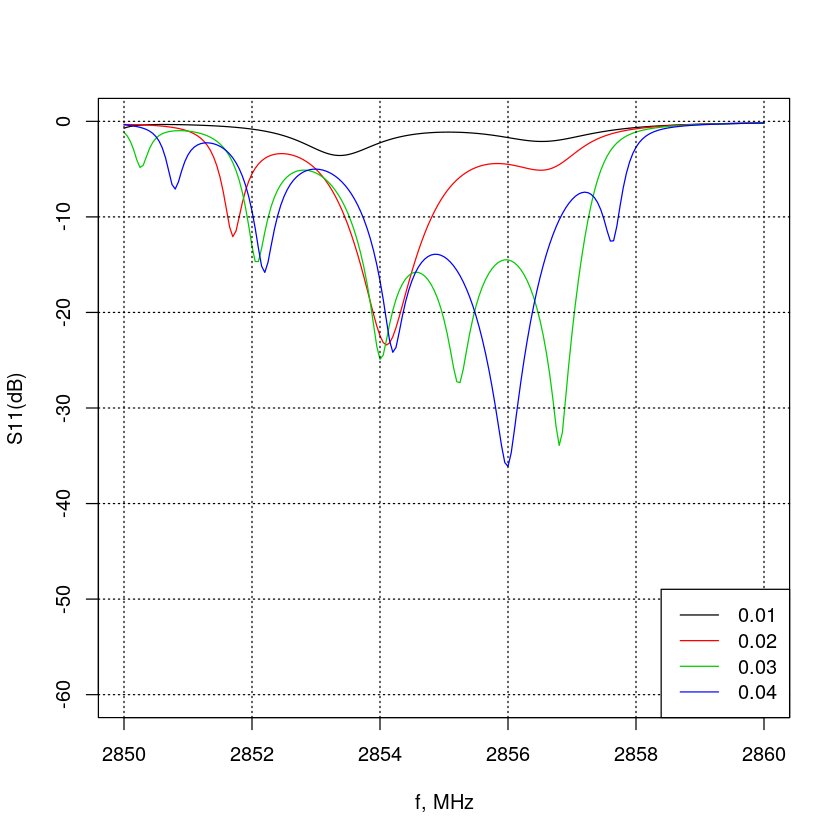

In [18]:
data$chi34   <- 19
data$chi43   <- 19
dat <- seq(0.01,0.04,0.01)
data$L <- dat[1]
Z <- solveZ(solveX(seq(2850e6, 2860e6, length.out = 201), data, A, B))
Z_db <- 20 * log10(abs(Mod((Z$z - 1) / (Z$z + 1))))  # S11_lin = (Z-1)/(Z+1); S11_dB = 20*log10(S11_lin)
plot(x=Z$f/1e6, y=Z_db, type = 'l', ylab = "S11(dB)", xlab = "f, MHz", ylim = c(-60, 0))
j <- 1
for (i in dat[-1]) {
data$L <- i
j <- j+1
Z <- solveZ(solveX(seq(2850e6, 2860e6, length.out = 201), data, A, B))
Z_db <- 20 * log10(abs(Mod((Z$z - 1) / (Z$z + 1))))  # S11_lin = (Z-1)/(Z+1); S11_dB = 20*log10(S11_lin)
lines(x=Z$f/1e6, y=Z_db, type = 'l', col=j)
}
grid(col='black')
legend("bottomright", legend=round(dat,2), lty=1, col=c(1:length(dat)))

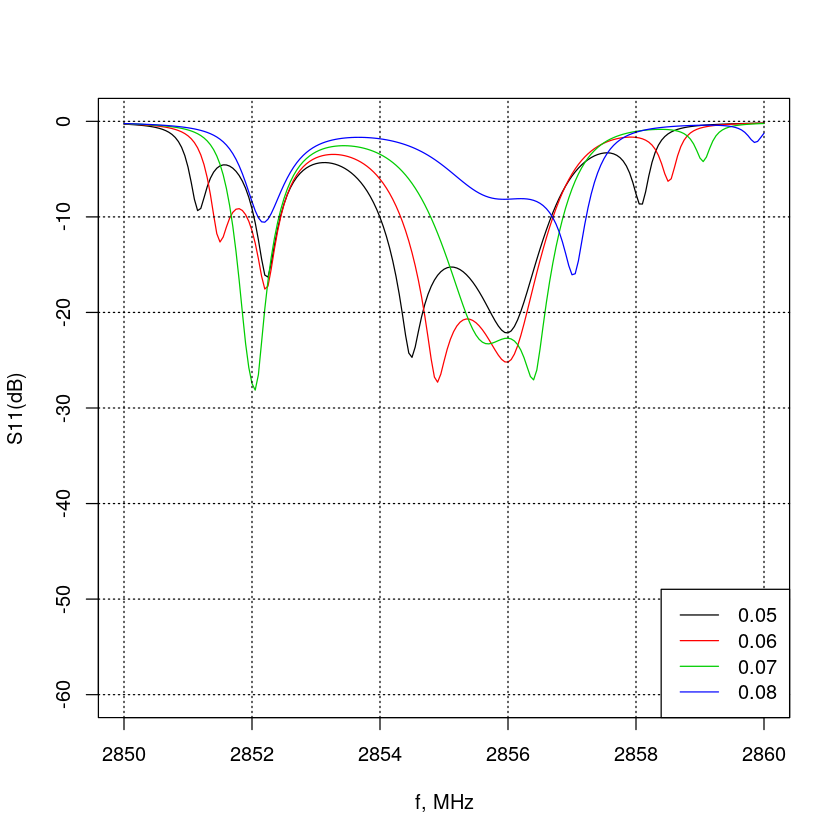

In [19]:
data$chi34   <- 19
data$chi43   <- 19
dat <- seq(0.05,0.08,0.01)
data$L <- dat[1]
Z <- solveZ(solveX(seq(2850e6, 2860e6, length.out = 201), data, A, B))
Z_db <- 20 * log10(abs(Mod((Z$z - 1) / (Z$z + 1))))  # S11_lin = (Z-1)/(Z+1); S11_dB = 20*log10(S11_lin)
plot(x=Z$f/1e6, y=Z_db, type = 'l', ylab = "S11(dB)", xlab = "f, MHz", ylim = c(-60, 0))
j <- 1
for (i in dat[-1]) {
data$L <- i
j <- j+1
Z <- solveZ(solveX(seq(2850e6, 2860e6, length.out = 201), data, A, B))
Z_db <- 20 * log10(abs(Mod((Z$z - 1) / (Z$z + 1))))  # S11_lin = (Z-1)/(Z+1); S11_dB = 20*log10(S11_lin)
lines(x=Z$f/1e6, y=Z_db, type = 'l', col=j)
}
grid(col='black')
legend("bottomright", legend=round(dat,2), lty=1, col=c(1:length(dat)))

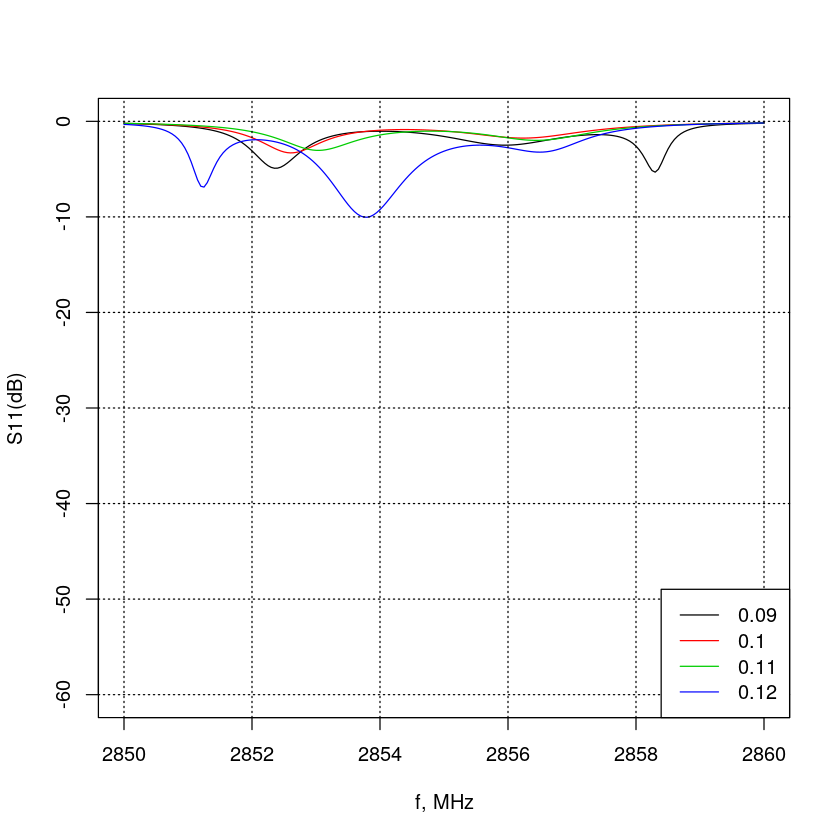

In [20]:
data$chi34   <- 19
data$chi43   <- 19
dat <- seq(0.09,0.12,0.01)
data$L <- dat[1]
Z <- solveZ(solveX(seq(2850e6, 2860e6, length.out = 201), data, A, B))
Z_db <- 20 * log10(abs(Mod((Z$z - 1) / (Z$z + 1))))  # S11_lin = (Z-1)/(Z+1); S11_dB = 20*log10(S11_lin)
plot(x=Z$f/1e6, y=Z_db, type = 'l', ylab = "S11(dB)", xlab = "f, MHz", ylim = c(-60, 0))
j <- 1
for (i in dat[-1]) {
data$L <- i
j <- j+1
Z <- solveZ(solveX(seq(2850e6, 2860e6, length.out = 201), data, A, B))
Z_db <- 20 * log10(abs(Mod((Z$z - 1) / (Z$z + 1))))  # S11_lin = (Z-1)/(Z+1); S11_dB = 20*log10(S11_lin)
lines(x=Z$f/1e6, y=Z_db, type = 'l', col=j)
}
grid(col='black')
legend("bottomright", legend=round(dat,2), lty=1, col=c(1:length(dat)))

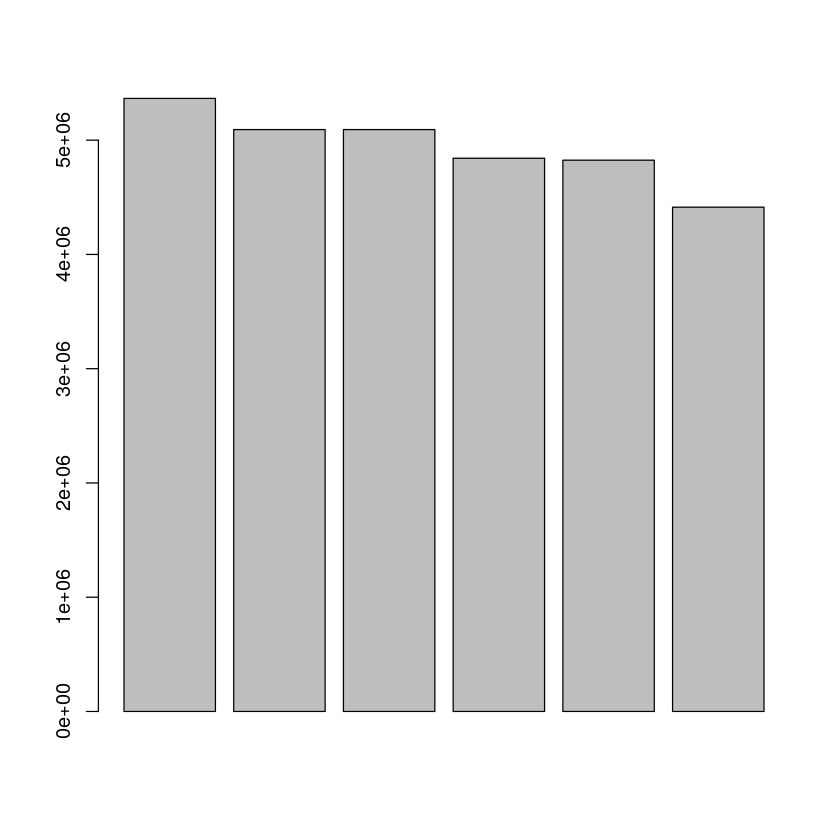

In [21]:
data$chi34   <- 17
data$chi43   <- data$chi34
data$L <- 0.07
barplot(Mod(solveX(2856e6,data, A, B)[,1]))